In [ ]:
# HANDWRITTEN DIGIT RECOGNITION

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets.mnist import load_data

In [ ]:
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


In [ ]:
print(test_digits.shape)

(10000, 28, 28)


In [ ]:
print(train_labels.shape)
print(test_digits.shape)

(60000,)
(10000, 28, 28)


In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Image count for each label in test data

> Indented block



In [ ]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

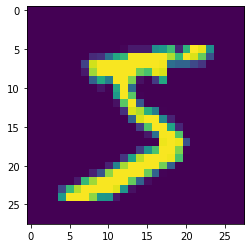

In [ ]:
# EDA
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit5')

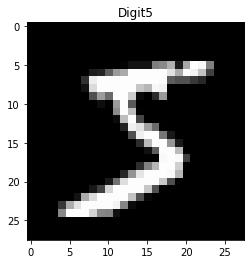

In [ ]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit"+ str(train_labels[0]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

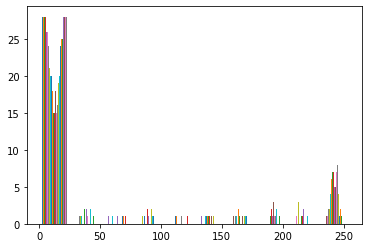

In [ ]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

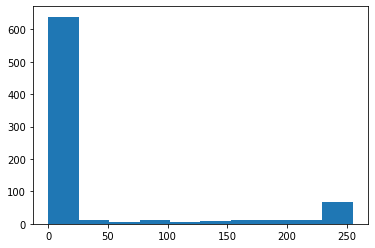

In [ ]:
plt.hist(train_digits[0].flat)

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

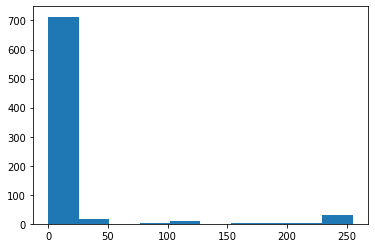

In [ ]:
plt.hist(train_digits[14].flat)

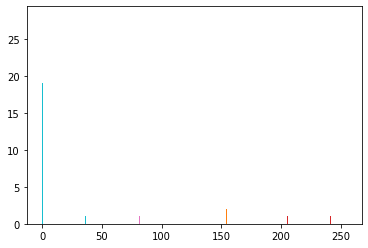

In [ ]:
plt.hist(train_digits[0],bins=255)
plt.show()

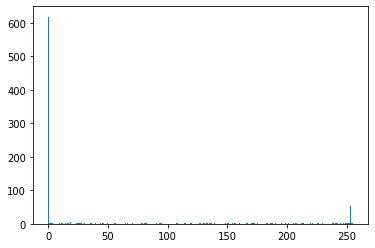

In [ ]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

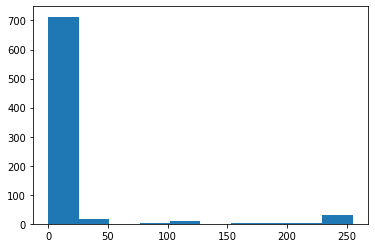

In [ ]:
plt.hist(train_digits[14].flat)   #pixel distribution for  digit 1

In [ ]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [ ]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([22647, 25827, 19387,  6452, 22341, 15012, 59851, 43496, 14334,
        2153, 26476, 17934, 43222,  8524, 17142, 19500])

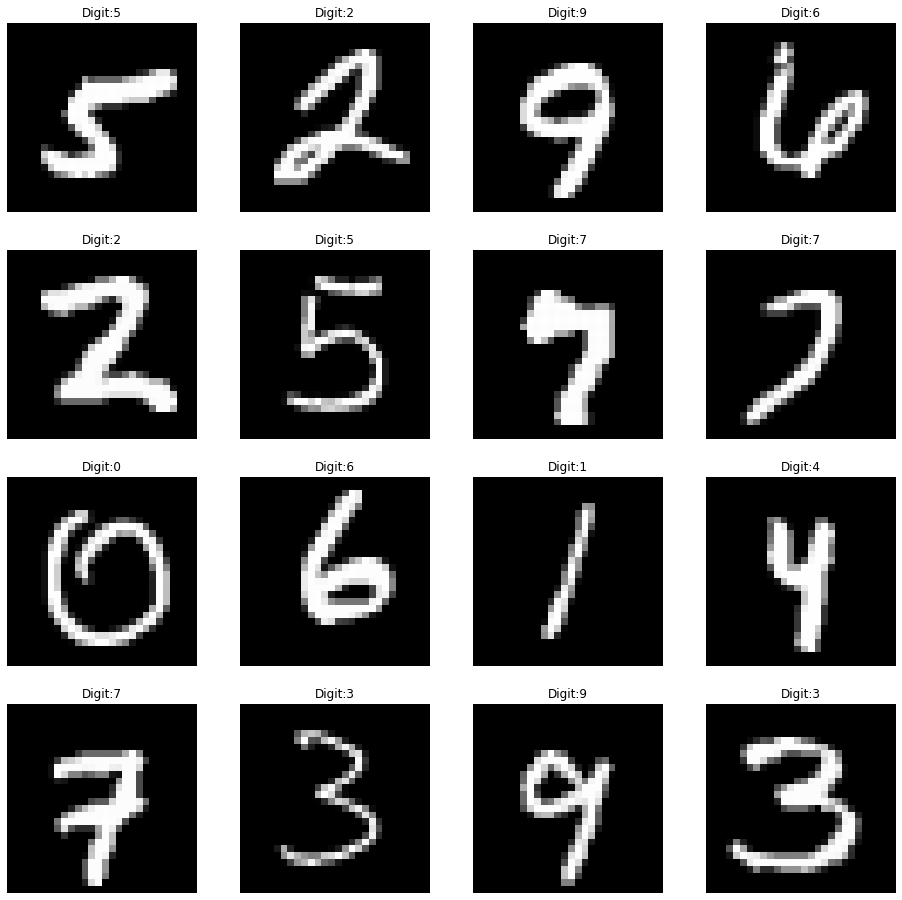

In [ ]:
# to display random 16 images
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis('off')
  j +=1


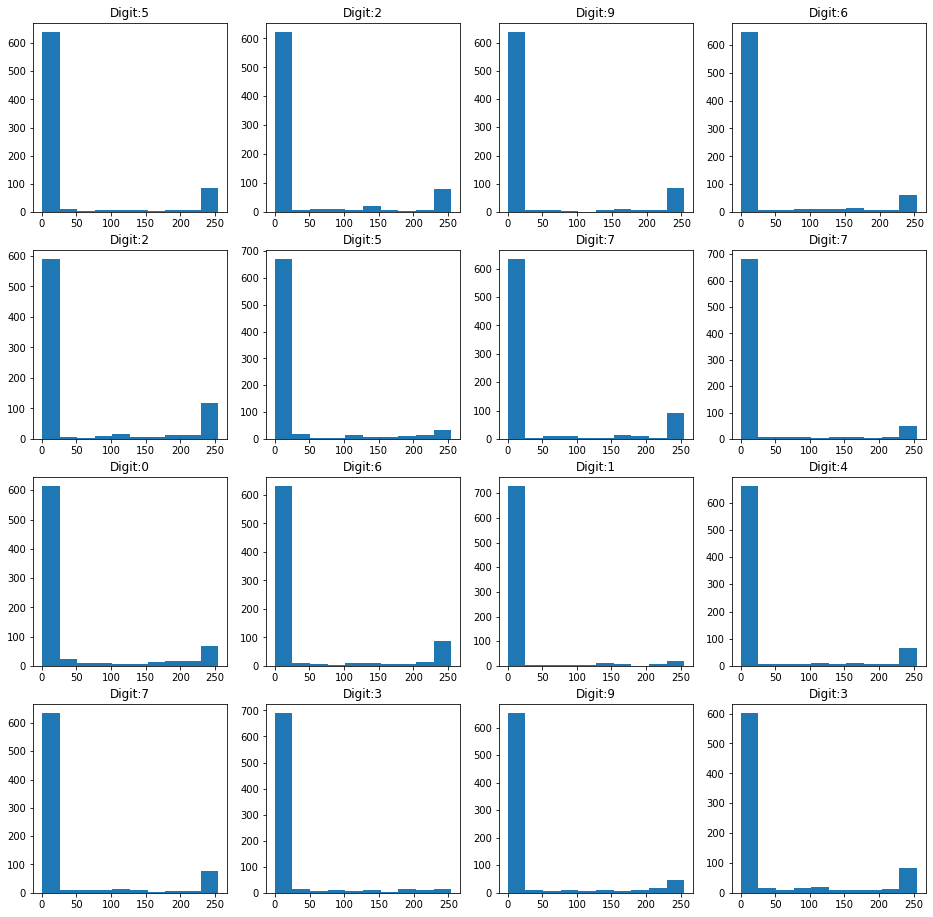

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit:"+str(train_labels[i]))
  #plt.axis('off')
  j +=1


PREPROCESSING

Scaling

In [ ]:
train_digits_sc = train_digits/255.0
test_digits_sc = test_digits/255.0

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_cat = to_categorical(train_labels)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

SPLIT THE TRAIN DATA TO TRAIN AND VALIDATION

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits,train_labels,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000,)


BUILD AND TRAIN THE MODEL

Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
# we are creating the base model
model = Sequential()
## first layer
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
# final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

COMPILE THE MODEL

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

training the model

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 131us/step - loss: 15117443856631.8301 - accuracy: 0.0000e+00 - val_loss: 59716949510892.2031 - val_accuracy: 0.0000e+00
Epoch 2/10
54000/54000 [==============================] - 6s 119us/step - loss: 110805211106402.0156 - accuracy: 0.0000e+00 - val_loss: 100483886715589.9688 - val_accuracy: 0.0000e+00
Epoch 3/10
54000/54000 [==============================] - 7s 122us/step - loss: 55940226390600.3594 - accuracy: 0.0242 - val_loss: 27357807446239.9141 - val_accuracy: 0.0000e+00
Epoch 4/10
54000/54000 [==============================] - 7s 122us/step - loss: 44129554958666.7109 - accuracy: 0.0508 - val_loss: 59767376185043.6250 - val_accuracy: 0.0000e+00
Epoch 5/10
54000/54000 [==============================] - 7s 124us/step - loss: 76704363139116.9062 - accuracy: 0.0657 - val_loss: 122942823236020.9062 - val_accuracy: 0.0000e+00
Epoch 6/10
54000/54000 [==========================

In [ ]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [ ]:
test_labels[0]

7

In [ ]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
model.predict(test_digits_sc[:10])

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]], dtype=float32)

In [ ]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([8])

In [ ]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
history.history

{'accuracy': [0.0,
  0.0,
  0.024185184,
  0.050777778,
  0.06574074,
  0.07687037,
  0.08746296,
  0.09412963,
  0.099907406,
  0.10790741],
 'loss': [15117443856631.83,
  110805211106402.0,
  55940226390600.36,
  44129554958666.71,
  76704363139116.9,
  114693646895245.39,
  152623128878863.7,
  196760192951556.03,
  240391359507512.75,
  264338662949077.6],
 'val_accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.14949999749660492,
  0.0,
  0.0,
  0.0063333334401249886],
 'val_loss': [59716949510892.2,
  100483886715589.97,
  27357807446239.914,
  59767376185043.625,
  122942823236020.9,
  164138766559783.6,
  82213038482696.88,
  219993928617689.1,
  405050417132950.9,
  277999420455256.06]}

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

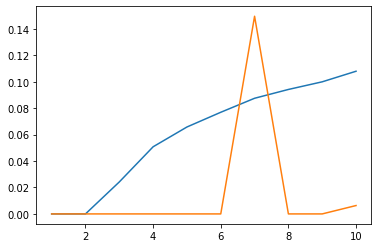

In [ ]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])